<a href="https://colab.research.google.com/github/jessicacristinams/BootcampTECHMINAs/blob/main/Desafio_Final_Setor_Aereo_Sarah_Gilbert_Tech_Minas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Final : Setor Aéreo**

Suponha que você trabalha na área de dados de uma companhia aérea. O objetivo do seu time de dados é trazer mais insights para o time de produtos sobre esse setor e otimizar rotas de voo, de modo que a companhia aérea seja o mais eficiente possível. Dado esse contexto, a sua equipe recebeu do time de operações dados históricos de voos de 2018 a 2022. Na pasta: setor aéreo, vocês encontram os dados em arquivos csvs ano a ano, um dicionário de dados e um arquivo csv com o de-para do código da cia aérea e seu nome. De posse dessas informações, o time de produtos e de operações solicitou a sua equipe as seguintes perguntas a serem respondidas:

#Bibliotecas

In [ ]:
#Importação das Bibliotecas
import numpy as np
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Layout

In [ ]:
# definindo as cores hexadecimais para dataviz
dark_blue = '#000616'
dark_pink = '#EF5476'
medium_pink = '#F5B2BB'
light_pink = '#F97394'
dark_purple = '#150429'
medium_purple = '#282D64'
light_purple = '#41467D'

#definindo uma palletas para utilizar no seaborn

sarah_gilbert_palette = [dark_blue, medium_purple, light_purple, light_pink, medium_pink, dark_pink]
cores_personalizadas = [dark_blue, light_purple, light_pink, medium_purple, dark_pink]
sarah_gilbert_palette_3hue = [dark_blue, light_purple, dark_pink]

#degrade para o heatmap:

sg_palette = sns.blend_palette([dark_blue, dark_purple, medium_purple, light_purple, light_pink, medium_pink, dark_pink], n_colors=7, as_cmap=True)

In [ ]:
#possibilitando exibir todas as colunas dos datasets
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Importação e Visão Geral das Bases

######link e informações adicionais sobre a base: [Flight Status Prediction](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022)

##Dados dos voos de 2018 a 2022

In [ ]:
dfs = []

for year in range(2018, 2023):
    filename = f'Sample_combined_flights_{year}.csv'
    df = pd.read_csv(filename)
    dfs.append(df)

# concatenate the data frames in the list
df = pd.concat(dfs)

In [ ]:
#mantendo o dataset nas configurações originais para posteriormente fazer a modelagem
df_o1 =df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292111 entries, 0 to 40422
Data columns (total 62 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               292111 non-null  int64  
 1   FlightDate                               292111 non-null  object 
 2   Airline                                  292111 non-null  object 
 3   Origin                                   292111 non-null  object 
 4   Dest                                     292111 non-null  object 
 5   Cancelled                                292111 non-null  bool   
 6   Diverted                                 292111 non-null  bool   
 7   CRSDepTime                               292111 non-null  int64  
 8   DepTime                                  284442 non-null  float64
 9   DepDelayMinutes                          284419 non-null  float64
 10  DepDelay                         

In [ ]:
df.head(5)

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,-5.0,1124.0,0.0,29.0,60.0,52.0,145.0,2018,1,1,5,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8877A,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,20.0,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,-6.0,1120.0,0.0,30.0,60.0,49.0,145.0,2018,1,1,14,7,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N836AY,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,16.0,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0
2,2,2018-01-04,Endeavor Air Inc.,EWN,ATL,True,False,1415,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,433.0,2018,1,1,4,4,DL,DL_CODESHARE,19790,DL,3301,9E,20363,9E,N836AY,3301,11617,1161708,31617,"New Bern/Morehead/Beaufort, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,NaN,NaN,1400-1459,NaN,NaN,NaN,NaN,1605,NaN,NaN,NaN,1600-1659,2,0.0
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,-3.0,2021.0,0.0,64.0,97.0,91.0,331.0,2018,1,1,9,2,DL,DL_CODESHARE,19790,DL,3302,9E,20363,9E,N8869B,3302,11641,1164102,31641,"Fayetteville, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1800-1859,10.0,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,10.0,704.0,0.0,22.0,56.0,39.0,83.0,2018,1,1,15,1,DL,DL_CODESHARE,19790,DL,3306,9E,20363,9E,N832AY,3306,11150,1115005,31150,"Columbus, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,0.0,0600-0659,9.0,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0


### Avaliação dos dados faltantes

In [ ]:
#identificação dos valores ausentes
is_na_count = df.isna().sum()

In [ ]:
#identificação das colunas com valores ausentes
cols_nulls = is_na_count[is_na_count >0 ]

In [ ]:
cols_nulls

DepTime                 7669
DepDelayMinutes         7692
DepDelay                7692
ArrTime                 7915
ArrDelayMinutes         8498
AirTime                 8567
ActualElapsedTime       8492
Tail_Number             2691
DepDel15                7692
DepartureDelayGroups    7692
TaxiOut                 7873
WheelsOff               7873
WheelsOn                7990
TaxiIn                  7990
ArrDelay                8498
ArrDel15                8498
ArrivalDelayGroups      8498
dtype: int64

In [ ]:
#percentual de valores nulos de cada variável
(cols_nulls / df.shape[0]) * 100

DepTime                 2.625372
DepDelayMinutes         2.633246
DepDelay                2.633246
ArrTime                 2.709586
ArrDelayMinutes         2.909168
AirTime                 2.932789
ActualElapsedTime       2.907114
Tail_Number             0.921225
DepDel15                2.633246
DepartureDelayGroups    2.633246
TaxiOut                 2.695208
WheelsOff               2.695208
WheelsOn                2.735262
TaxiIn                  2.735262
ArrDelay                2.909168
ArrDel15                2.909168
ArrivalDelayGroups      2.909168
dtype: float64

In [ ]:
#verificando o número de linhas da base com valores faltantes
df_nulos = df[df.isna().any(axis=1)]
#percentual do número de linhas com valores faltantes:
(len(df_nulos))/len(df)

0.0294032063154075

In [ ]:
#avaliação da base ignorando os valores ausentes
df.dropna().head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,-5.0,1124.0,0.0,29.0,60.0,52.0,145.0,2018,1,1,5,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8877A,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,20.0,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,-6.0,1120.0,0.0,30.0,60.0,49.0,145.0,2018,1,1,14,7,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N836AY,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,0.0,-1.0,1000-1059,16.0,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,-3.0,2021.0,0.0,64.0,97.0,91.0,331.0,2018,1,1,9,2,DL,DL_CODESHARE,19790,DL,3302,9E,20363,9E,N8869B,3302,11641,1164102,31641,"Fayetteville, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1800-1859,10.0,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,10.0,704.0,0.0,22.0,56.0,39.0,83.0,2018,1,1,15,1,DL,DL_CODESHARE,19790,DL,3306,9E,20363,9E,N832AY,3306,11150,1115005,31150,"Columbus, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,0.0,0600-0659,9.0,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0
5,5,2018-01-14,Endeavor Air Inc.,MSP,AZO,False,False,1929,2004.0,35.0,35.0,2333.0,86.0,62.0,98.0,149.0,426.0,2018,1,1,14,7,DL,DL_CODESHARE,19790,DL,3308,9E,20363,9E,N186PQ,3308,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,10469,1046902,30469,"Kalamazoo, MI",MI,26,Michigan,43,1.0,2.0,1900-1959,82.0,2126.0,2328.0,5.0,2207,86.0,1.0,5.0,2200-2259,2,0.0


Acima verifica-se que só tem valores 'False' em voos desviados e cancelados.
Abaixo investiga-se se todos os voos cancelados ou desviados apresentam dados faltantes:

In [ ]:
len(df[df['Cancelled']== True].dropna())

0

In [ ]:
len(df[df['Diverted']== True].dropna())

0

##Dicionário de códigos das Airlines

In [ ]:
Airlines = pd.read_csv('Airlines.csv')

In [ ]:
Airlines.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [ ]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1570 non-null   object
 1   Description  1571 non-null   object
dtypes: object(2)
memory usage: 24.7+ KB


#Modificações na Base

##Conversão de Tipo de Variável

In [ ]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')

##Criações de variáveis

###**Route**

In [ ]:
#Definindo a rota a partir da Origem e Destino

df['Route'] = df['Origin']+'-'+df['Dest']

In [ ]:
df['Route'].head()

0    ATL-ABY
1    ATL-ABY
2    EWN-ATL
3    FAY-ATL
4    CSG-ATL
Name: Route, dtype: object

###**TotalDelay**

##### *Observação: Utilizaremos somente esta variável para avaliar o atraso do voo. Portanto excluir-se-á as demais variáveis de delay da base

In [ ]:
df['TotalDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']

In [ ]:
atraso = 'TotalDelay'

In [ ]:
#exclusão das colunas para não interferirem nos modelos
df.drop(columns = ['ActualElapsedTime','CRSElapsedTime'],inplace=True)

###**TotalDelayMinutes**

In [ ]:
#criando coluna com base na coluna 'TotalDelay'
df['TotalDelayMinutes'] = df['TotalDelay']

In [ ]:
df.loc[df['TotalDelayMinutes']<0, 'TotalDelayMinutes'] = 0


###**TotalDel15**

In [ ]:
#esta variável é um indicador de atraso
df.loc[df['TotalDelayMinutes']<=15, 'TotalDel15'] = 0
df.loc[df['TotalDelayMinutes']>15, 'TotalDel15'] = 1

#Organização dos datasets

In [ ]:
#mantendo o dataset com valores faltantes
df_o = df.copy()

In [ ]:
voos_cancelados = df_o[df_o['Cancelled']==True]

In [ ]:
voos_desviados = df_o[df_o['Diverted']==True]

In [ ]:
#descartando os valores nulos de df
df.dropna(inplace=True)

In [ ]:
voos_atrasados = df[df['TotalDel15']==1]

##Exclusão das variáveis associadas aos Atrasos que não serão utilizados na análise e modelo

In [ ]:
atrasos_nao_utilizados = ['ArrDelay','DepDelay','ArrDelayMinutes','DepDelayMinutes','ArrDel15','DepDel15','DepartureDelayGroups','ArrivalDelayGroups']
df.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)
df_o.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)
voos_cancelados.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)
voos_desviados.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)
voos_atrasados.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)

<ipython-input-33-633b68160b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voos_cancelados.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)
<ipython-input-33-633b68160b2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voos_desviados.drop(columns = atrasos_nao_utilizados,axis=1,inplace = True)
<ipython-input-33-633b68160b2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voos_atrasados.drop(columns = atrasos_nao_u

#**Estudo de Caso**

In [ ]:
#função que retorna os principais elementos de uma coluna considerando o percentual acumulado
def criterio_freq_acum(df,coluna,pACUM ):
  df_qtd = df[coluna].value_counts().to_frame('Qtd')
  df_qtd['Qtd_ACUM'] = df_qtd['Qtd'].cumsum()
  df_qtd['perc_ACUM'] = df_qtd['Qtd_ACUM']/df_qtd['Qtd'].sum()
  principais = df_qtd.query("perc_ACUM<{}".format(pACUM)).index.to_list()
  return principais

##1) Análise de Companhias Aéreas

###**1 - Quais são as principais companhias aéreas que mais voaram durante cada ano?**

#### Companhias que comercializaram 90% dos voos

In [ ]:
#Quantidades de companhias comercializadoras
len(df_o['Marketing_Airline_Network'].unique())

11

In [ ]:
comercializadoras = df_o['Marketing_Airline_Network'].unique()
comercializadoras

array(['DL', 'B6', 'UA', 'G4', 'HA', 'NK', 'AS', 'F9', 'WN', 'VX', 'AA'],
      dtype=object)

In [ ]:
#companhias que juntas representam 90% das vendas
companhias_mais_comercializaram = criterio_freq_acum(df_o,'Marketing_Airline_Network',0.9)
companhias_mais_comercializaram

['AA', 'DL', 'UA', 'WN', 'AS']

In [ ]:
#nome das companhias
Airlines[Airlines['Code'].isin(companhias_mais_comercializaram)]

,Code,Description
142,AA,American Airlines Inc.
264,AS,Alaska Airlines Inc.
484,DL,Delta Air Lines Inc.
1368,UA,United Air Lines Inc.
1463,WN,Southwest Airlines Co.


In [ ]:
#Tabelando as vendas ao longo dos anos e o Total de cada companhia comercializadora
vendas_por_ano = pd.crosstab(df_o['Marketing_Airline_Network'], df_o['Year'], colnames=['Year'])
vendas_por_ano['Total'] = vendas_por_ano.sum(axis=1)
vendas_por_ano = vendas_por_ano.sort_values(by='Total', ascending=False)
vendas_por_ano

Year,2018,2019,2020,2021,2022,Total
Marketing_Airline_Network,,,,,,
AA,8372,21110,13188,16669,10410,69749
DL,8382,17623,10723,13733,8567,59028
UA,15310,15731,9012,11578,7175,58806
WN,13494,13654,9661,10663,7289,54761
AS,3155,4433,2815,3589,2224,16216
B6,3034,3000,1447,2000,1515,10996
NK,1769,2071,1315,1873,1284,8312
F9,1203,1374,900,1390,888,5755
G4,985,1041,1038,1208,681,4953


####Principais Operadoras

In [ ]:
#considerando voos regulares e com desvios
df_voos = df_o[df_o['Cancelled']==False]

In [ ]:
principais_companhias = criterio_freq_acum(df_voos,'Airline',0.9)

In [ ]:
len(df_o['Airline'].unique())

28

In [ ]:
print(principais_companhias,len(principais_companhias))

['Southwest Airlines Co.', 'Delta Air Lines Inc.', 'SkyWest Airlines Inc.', 'American Airlines Inc.', 'United Air Lines Inc.', 'Republic Airlines', 'JetBlue Airways', 'Envoy Air', 'Endeavor Air Inc.', 'Comair Inc.', 'Alaska Airlines Inc.', 'Spirit Air Lines', 'Mesa Airlines Inc.', 'Frontier Airlines Inc.'] 14


In [ ]:
# número de voos por companhia aérea em cada ano
voos_por_airline_year = df_voos.groupby(['Year','Airline']).size().reset_index(name = 'Total de Voos')

table = pd.crosstab(df['Airline'], df['Year'], colnames=['Year'])
table = table.sort_values(by=table.columns.tolist(), ascending=False)

#Exibindo as 5 principais companhias aereas
table.head()

Year,2018,2019,2020,2021,2022
Airline,,,,,
Southwest Airlines Co.,13291,13261,8865,10418,7086
United Air Lines Inc.,6194,6226,2950,4427,3300
SkyWest Airlines Inc.,5270,8095,5641,7384,4219
Delta Air Lines Inc.,4587,9945,5543,7437,5096
American Airlines Inc.,3727,9364,5349,7206,4745


In [ ]:
# Selecionando as 5 empresas com maior número de voos em cada ano
top_5_airlines = voos_por_airline_year.groupby('Year').apply(lambda x: x.nlargest(5, 'Total de Voos')).reset_index(drop=True)

###**2 - A pandemia afetou a operação de alguma delas? De que forma?**

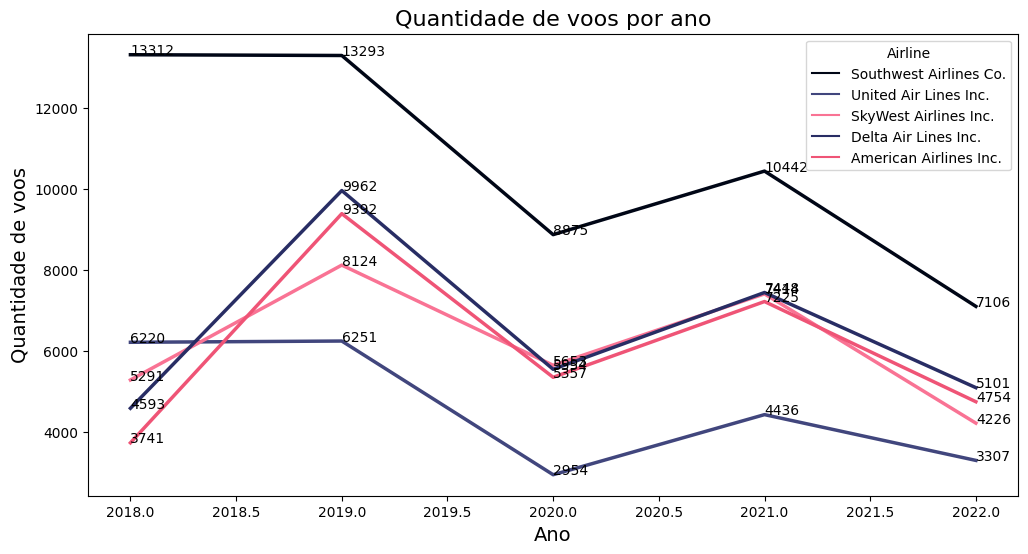

In [ ]:
# cria uma figura com 1 subplot
fig, ax = plt.subplots(figsize=(12,6))

# plota o gráfico usando as cores personalizadas
sns.lineplot(data=top_5_airlines, x='Year', y='Total de Voos', hue='Airline', linewidth=2.5, ax=ax, palette = cores_personalizadas)

# adiciona título e labels nos eixos
ax.set_title('Quantidade de voos por ano', fontsize=16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Quantidade de voos', fontsize=14)

# adiciona marcadores com os valores de 'Total de Voos' de cada ano
for i, row in top_5_airlines.iterrows():
    ax.annotate(row['Total de Voos'], xy=(row['Year'], row['Total de Voos']), fontsize=10)

# mostra o gráfico
plt.show()

####Avaliando um contexto mais geral

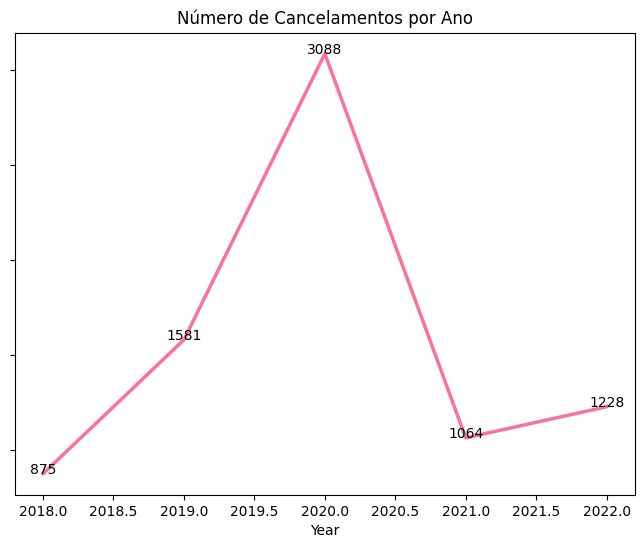

In [ ]:
#cancelamentos ao longo dos anos

plt.figure(figsize=(8,6))

ax = sns.lineplot(data= voos_cancelados.groupby('Year')['Cancelled'].sum().reset_index(), x='Year', y='Cancelled', color = light_pink, linewidth=2.5)
for index, row in voos_cancelados.groupby('Year')['Cancelled'].sum().reset_index().iterrows():
  plt.annotate(row['Cancelled'], xy=(row['Year'], row['Cancelled']), ha='center');
ax.set_title('Número de Cancelamentos por Ano')
ax.set_ylabel('')
ax.set_yticklabels([])
plt.show();

In [ ]:
#verificando até que mês temos registros de voos em 2022
df_o[df_o['Year']==2022]['Month'].unique()

array([4, 2, 7, 5, 6, 1, 3])

In [ ]:
df_total = df_voos.groupby(['Year']).size()

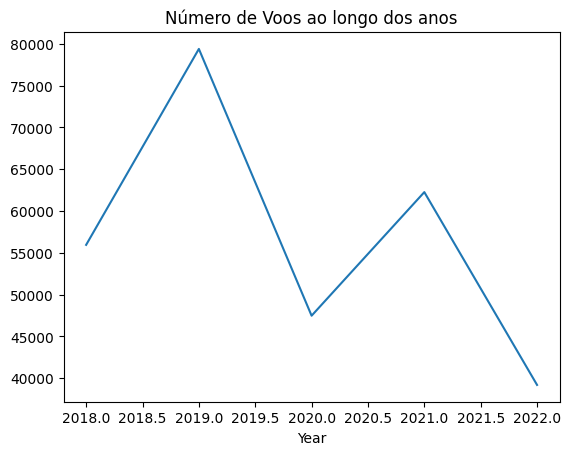

In [ ]:
ax = df_total.plot();
ax.set_title('Número de Voos ao longo dos anos');

###**3 - Quais as companhias que alteraram mais voos durante a pandemia?**

Considerações:
-  Tipos de Alteração:
  1. Atrasos
  2. Cancelamentos
  3. Desvio de rota

- Início da Pandemia: 11 de março de 2020

In [ ]:
inicio_pandemia = pd.to_datetime('2020-03-11')
voos_durante_pandemia = df_o[df_o['FlightDate'] > inicio_pandemia]
voos_cancelados_durante_pandemia = voos_cancelados[voos_cancelados['FlightDate'] > inicio_pandemia]
voos_desviados_durante_pandemia = voos_desviados[voos_desviados['FlightDate'] > inicio_pandemia]
voos_atrasados_durante_pandemia = voos_atrasados[voos_atrasados['FlightDate'] > inicio_pandemia]

In [ ]:
# Agrupa os dados por companhia aérea e ano e conta a quantidade de voos cancelados
voos_cancelados_durante_pandemia = voos_cancelados_durante_pandemia[['Airline','Cancelled']].groupby(['Airline'])['Cancelled'].sum().reset_index(name= 'Cancelado').sort_values('Cancelado',ascending = False)

In [ ]:
# Agrupa os dados por companhia aérea e ano e conta a quantidade de voos desviados
voos_desviados_durante_pandemia = voos_desviados_durante_pandemia.groupby(['Airline'])['Diverted'].sum().reset_index(name= 'Desviado').sort_values('Desviado',ascending = False)

In [ ]:
# Agrupa os dados por companhia aérea e ano e conta a quantidade de voos atrasados
voos_atrasados_durante_pandemia = voos_atrasados_durante_pandemia.groupby(['Airline']).size().reset_index(name= 'Atrasado').sort_values('Atrasado',ascending = False)

In [ ]:
# Combina as tabelas de voos cancelados e desviados por companhia aérea e ano
voos_alterados = pd.merge(voos_cancelados_durante_pandemia, voos_desviados_durante_pandemia, on=['Airline'], how="outer")
voos_alterados = pd.merge(voos_alterados, voos_atrasados_durante_pandemia, on=['Airline'], how="outer")
voos_alterados = voos_alterados.fillna(0)
# Agrupa os dados novamente por ano e ordena de forma decrescente a quantidade de voos cancelados, desviados e atrasados por companhia aérea em cada ano

voos_alterados['Voos alterados'] = voos_alterados['Cancelado'] + voos_alterados['Desviado'] + voos_alterados['Atrasado']
voos_alterados = voos_alterados[['Airline','Voos alterados']]
voos_alterados = voos_alterados.groupby('Airline')['Voos alterados'].sum().reset_index().sort_values(['Voos alterados'],ascending=False)


####**5 principais companhias que mais fizeram alterações em voos em numeros absolutos**

In [ ]:
voos_alterados.head()

,Airline,Voos alterados
21,Southwest Airlines Co.,1848.0
3,American Airlines Inc.,1476.0
20,SkyWest Airlines Inc.,1280.0
8,Delta Air Lines Inc.,1080.0
24,United Air Lines Inc.,911.0


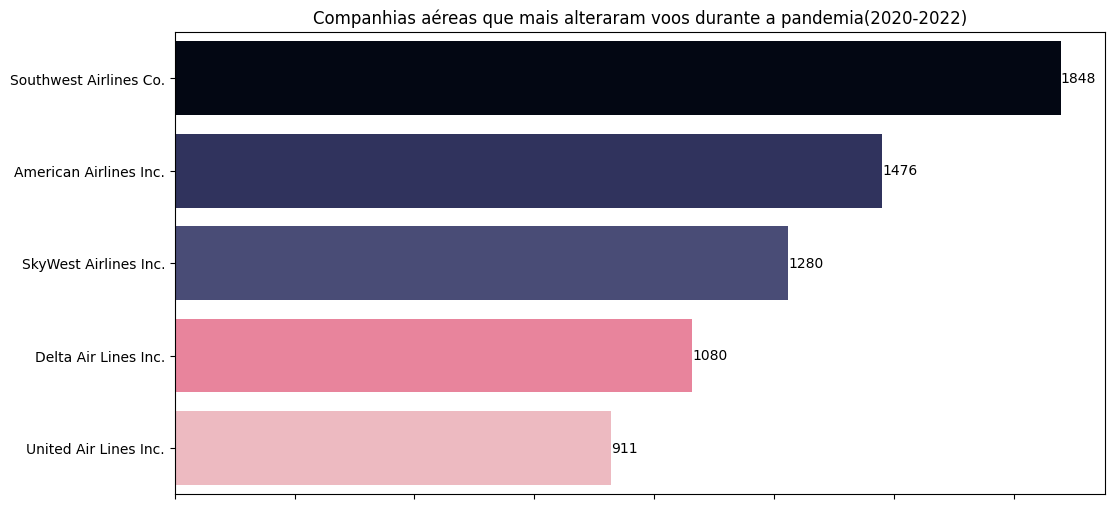

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=voos_alterados.head(), x='Voos alterados',y= 'Airline',orient = 'h',palette = sarah_gilbert_palette)

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
ax.set_title('Companhias aéreas que mais alteraram voos durante a pandemia(2020-2022)')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('')

plt.show()

###**4 - Quais as principais rotas aéreas das principais companhias?**

In [ ]:
# Seleciona os voos das principais companhias aéreas
df_principais_companhias = pd.concat([df[df['Airline'].isin(principais_companhias)], voos_cancelados[voos_cancelados['Airline'].isin(principais_companhias)], voos_desviados[voos_desviados['Airline'].isin(principais_companhias)]])
df_principais_companhias.shape

(259083, 56)

In [ ]:
 # Ordena as rotas pela quantidade de voos realizados em ordem decrescente
top_routes = df_principais_companhias.groupby(by=['Airline','Route']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
top_routes.head()


,Airline,Route,Count
10259,Southwest Airlines Co.,HOU-DAL,253
9974,Southwest Airlines Co.,DAL-HOU,224
26,Alaska Airlines Inc.,ANC-SEA,222
294,Alaska Airlines Inc.,SEA-ANC,217
2468,Delta Air Lines Inc.,MCO-ATL,211


In [ ]:
for airlines in principais_companhias:

  display(top_routes[top_routes['Airline'] == airlines].nlargest(3,'Count'))

,Airline,Route,Count
10259,Southwest Airlines Co.,HOU-DAL,253
9974,Southwest Airlines Co.,DAL-HOU,224
10107,Southwest Airlines Co.,DEN-PHX,172


,Airline,Route,Count
2468,Delta Air Lines Inc.,MCO-ATL,211
1998,Delta Air Lines Inc.,ATL-MCO,204
2435,Delta Air Lines Inc.,LGA-ATL,184


,Airline,Route,Count
9314,SkyWest Airlines Inc.,SFO-LAX,137
8517,SkyWest Airlines Inc.,LAX-SFO,121
8871,SkyWest Airlines Inc.,ORD-DTW,103


,Airline,Route,Count
904,American Airlines Inc.,LAX-DFW,170
736,American Airlines Inc.,DFW-ORD,162
713,American Airlines Inc.,DFW-LAX,160


,Airline,Route,Count
12664,United Air Lines Inc.,MCO-EWR,168
12742,United Air Lines Inc.,ORD-DEN,166
12290,United Air Lines Inc.,DEN-IAH,165


,Airline,Route,Count
6949,Republic Airlines,LGA-DCA,154
6556,Republic Airlines,DCA-LGA,133
6358,Republic Airlines,BOS-LGA,124


,Airline,Route,Count
5344,JetBlue Airways,DCA-BOS,155
5462,JetBlue Airways,JFK-FLL,134
5265,JetBlue Airways,BOS-DCA,133


,Airline,Route,Count
3839,Envoy Air,DFW-XNA,98
4095,Envoy Air,ORD-CMH,89
4245,Envoy Air,SGF-DFW,89


,Airline,Route,Count
2893,Endeavor Air Inc.,ATL-AGS,83
2886,Endeavor Air Inc.,AGS-ATL,74
2905,Endeavor Air Inc.,ATL-CHA,73


,Airline,Route,Count
1699,Comair Inc.,GSP-CLT,110
1523,Comair Inc.,CLT-GSP,103
1568,Comair Inc.,CLT-SAV,95


,Airline,Route,Count
26,Alaska Airlines Inc.,ANC-SEA,222
294,Alaska Airlines Inc.,SEA-ANC,217
326,Alaska Airlines Inc.,SEA-LAX,201


,Airline,Route,Count
11467,Spirit Air Lines,ATL-FLL,70
11820,Spirit Air Lines,LGA-FLL,66
11696,Spirit Air Lines,FLL-LGA,63


,Airline,Route,Count
5838,Mesa Airlines Inc.,DFW-HOU,77
5920,Mesa Airlines Inc.,HOU-DFW,76
5847,Mesa Airlines Inc.,DFW-LBB,76


,Airline,Route,Count
4523,Frontier Airlines Inc.,DEN-LAS,73
4956,Frontier Airlines Inc.,PHL-MCO,65
4691,Frontier Airlines Inc.,LAS-DEN,62


###**5 - Qual é a companhia que tem maior % de cancelamento de voos e atraso?**

####Percentual de Cancelamento

In [ ]:
voos_cancelados_por_companhia_aerea = voos_cancelados.groupby('Airline')['Cancelled'].sum().reset_index(name='Voos Cancelados')
# Combina as tabelas de quantidade total de voos e quantidade de voos cancelados por companhia aérea e ano
percentuais = pd.merge(df_o.groupby('Airline').size().reset_index(name= 'Total de Voos'), voos_cancelados_por_companhia_aerea, on=['Airline'], how='outer')
percentuais.fillna(0,inplace= True)
percentuais['% de cancelamento'] = percentuais['Voos Cancelados'] / percentuais['Total de Voos'] * 100
percentuais.head()

,Airline,Total de Voos,Voos Cancelados,% de cancelamento
0,Air Wisconsin Airlines Corp,3774,131.0,3.471118
1,Alaska Airlines Inc.,9026,164.0,1.816973
2,Allegiant Air,4953,252.0,5.087826
3,American Airlines Inc.,31455,986.0,3.134637
4,Cape Air,12,0.0,0.000000


In [ ]:
companhia_com_maior_percentual_de_cancelamentos = percentuais[percentuais['% de cancelamento']==percentuais['% de cancelamento'].max()]
companhia_com_maior_percentual_de_cancelamentos

,Airline,Total de Voos,Voos Cancelados,% de cancelamento
20,Peninsula Airways Inc.,29,3.0,10.344828


In [ ]:
airline_g_cancell = companhia_com_maior_percentual_de_cancelamentos['Airline'].iloc[0]


In [ ]:
#verificando até quando há indícios de funcionamento da companhia
df_o[df_o['Airline']== airline_g_cancell].groupby(['Year','Month']).size().reset_index(name='Voos registrados')

,Year,Month,Voos registrados
0,2018,1,5
1,2018,10,1
2,2018,11,1
3,2018,12,3
4,2019,1,3
5,2019,2,1
6,2019,3,2
7,2019,4,2
8,2019,5,2
9,2019,6,2


####Percentual de Atrasos

In [ ]:
def percentual_por_airlines(df):
    total_flights_by_airline = df.groupby('Airline')['FlightDate'].count().reset_index(name='Total de Voos')
    # Agrupa por companhia aérea o numero de voos
    delayed_flights_by_airline = df.groupby(['Airline'])['TotalDel15'].sum().reset_index(name= 'Total de atrasos')
    # Calculo do percentual de atraso
    results = pd.merge(total_flights_by_airline.groupby('Airline')['Total de Voos'].sum().reset_index(), delayed_flights_by_airline, on=['Airline'], how='outer')
    results = results.fillna(0)
    results['% de Atrasos'] = (delayed_flights_by_airline['Total de atrasos'] / total_flights_by_airline['Total de Voos']) * 100

    return results

In [ ]:
percentual_de_atrasos_por_airline = percentual_por_airlines(df_o[df_o['Cancelled'] == 0])
maior_percentual_atrasos = percentual_de_atrasos_por_airline['% de Atrasos'].idxmax()
linha_maior_percentual_atrasos = percentual_de_atrasos_por_airline.loc[percentual_de_atrasos_por_airline.index == maior_percentual_atrasos]
linha_maior_percentual_atrasos

,Airline,Total de Voos,Total de atrasos,% de Atrasos
7,"Commutair Aka Champlain Enterprises, Inc.",2542,247.0,9.716758


In [ ]:
airline_g_delay = linha_maior_percentual_atrasos['Airline'].iloc[0]


In [ ]:
#atraso máximo da companhia em minutos
df_o[df_o['Airline']== airline_g_delay][atraso].max()

126.0

In [ ]:
#atraso médio da companhia em minutos
voos_atrasados[voos_atrasados['Airline']== airline_g_delay]['TotalDelayMinutes'].median()

26.0

In [ ]:
#verificando até quando há indícios de funcionamento da companhia
df_o[df_o['Airline']== airline_g_delay].groupby(['Year','Month']).size().reset_index(name='Voos registrados')

,Year,Month,Voos registrados
0,2018,1,38
1,2018,2,23
2,2018,3,40
3,2018,4,31
4,2018,5,35
5,2018,6,46
6,2018,7,35
7,2018,8,51
8,2018,9,44
9,2018,10,52


####Investigação da média atrasos e atrasos máximos

In [ ]:
voos_atrasados.groupby('Airline')['TotalDelayMinutes'].median().reset_index(name = 'atraso_medio').sort_values('atraso_medio',ascending = False)

,Airline,atraso_medio
6,"Commutair Aka Champlain Enterprises, Inc.",26.0
20,Republic Airlines,26.0
13,Frontier Airlines Inc.,25.0
25,United Air Lines Inc.,25.0
17,JetBlue Airways,25.0
14,"GoJet Airlines, LLC d/b/a United Express",25.0
10,Endeavor Air Inc.,25.0
11,Envoy Air,25.0
12,ExpressJet Airlines Inc.,24.0
24,Trans States Airlines,24.0


In [ ]:
voos_atrasados.groupby('Airline')['TotalDelayMinutes'].max().reset_index(name = 'atraso_max').sort_values('atraso_max',ascending = False)

,Airline,atraso_max
11,Envoy Air,278.0
5,Comair Inc.,206.0
8,Delta Air Lines Inc.,186.0
25,United Air Lines Inc.,185.0
13,Frontier Airlines Inc.,180.0
18,Mesa Airlines Inc.,177.0
2,Allegiant Air,163.0
10,Endeavor Air Inc.,150.0
21,SkyWest Airlines Inc.,145.0
20,Republic Airlines,140.0


####Percentual de Cancelamentos e Atrasos

In [ ]:
percentuais1 = pd.merge(percentuais, percentual_de_atrasos_por_airline,on =['Airline','Total de Voos'],how ='outer')
percentuais1 = percentuais1.fillna(0)

In [ ]:
percentuais1['Cancelamentos e Atrasos']  = percentuais1['Voos Cancelados'] + percentuais1['Total de atrasos']

In [ ]:
percentuais1.drop(['Voos Cancelados', '% de cancelamento', 'Total de atrasos', '% de Atrasos'],axis=1, inplace = True)

In [ ]:
percentuais1['% de cancelamentos e atrasos'] = (percentuais1['Cancelamentos e Atrasos']/percentuais1['Total de Voos'])*100

In [ ]:
companhia_com_maior_percentual_de_cancelamentos_e_atrasos = percentuais1[percentuais1['% de cancelamentos e atrasos'] == percentuais1['% de cancelamentos e atrasos'].max()]

In [ ]:
#As 3 primeiras companhias campeãs em cancelamento e atrasos(valores percentuais)
percentuais1.sort_values('% de cancelamentos e atrasos', ascending = False).head(3)

,Airline,Total de Voos,Cancelamentos e Atrasos,% de cancelamentos e atrasos
20,Peninsula Airways Inc.,29,3.0,10.344828
34,"Commutair Aka Champlain Enterprises, Inc.",2542,247.0,9.716758
52,Trans States Airlines,1567,149.0,9.508615


In [ ]:
# verificando se os registros podem indicar a extinsão da Trans State Airlines
df_o[df_o['Airline']== 'Trans States Airlines'].groupby(['Year','Month']).size().reset_index(name='Voos registrados')

,Year,Month,Voos registrados
0,2018,1,51
1,2018,2,51
2,2018,3,67
3,2018,4,49
4,2018,5,56
5,2018,6,57
6,2018,7,65
7,2018,8,67
8,2018,9,61
9,2018,10,60


##2) Análise da eficiência das rotas.


###**1. Quais as principais rotas de voos?**





In [ ]:
principais_rotas = criterio_freq_acum(df_o,'Route',0.9)
len(principais_rotas)

3482

In [ ]:
len(df_o.Route.unique())

7169

In [ ]:
#90% dos voos são alocados para 48.57% das rotas
round(100*(3482/7169),2)


48.57

In [ ]:
#5 principais rotas mais utilizadas:
df_o.groupby('Route').size().reset_index(name = 'Count').sort_values('Count',ascending = False).head()

,Route,Count
3653,LAX-SFO,530
6355,SFO-LAX,522
4915,ORD-LGA,451
3606,LAX-LAS,450
3492,LAS-LAX,450


###**2 - Quais as rotas em que temos maior tempo de atraso?**

In [ ]:
Maiores_atrasos_por_rota = df.groupby(['Route'])[atraso].max().reset_index().sort_values('TotalDelay',ascending=False)


In [ ]:
Maiores_atrasos_por_rota.head(5)

,Route,TotalDelay
3163,IND-AUS,278.0
1098,CLE-DCA,206.0
6556,SLC-ORD,186.0
2316,EWR-MCO,185.0
5736,RDU-SAT,180.0


###**3 - Quais as rotas em que temos maior índice de cancelamento de voos?**


In [ ]:
indice_de_cancelamento_por_rota = df_o.groupby('Route')['Cancelled'].sum().reset_index(name = 'Voos Cancelados por Rota').sort_values('Voos Cancelados por Rota',ascending = False)

In [ ]:
voos_por_rota = df_o.groupby('Route').size().reset_index(name = 'Total de Voos')

In [ ]:
tabela = pd.merge(indice_de_cancelamento_por_rota,voos_por_rota,on='Route')
tabela['% de Cancelamento por Rota'] = 100*(tabela['Voos Cancelados por Rota']/tabela['Total de Voos'])

In [ ]:
tabela.sort_values('Voos Cancelados por Rota',ascending = False).head(5)

,Route,Voos Cancelados por Rota,Total de Voos,% de Cancelamento por Rota
0,LGA-ORD,21,416,5.048077
2,DAL-HOU,20,224,8.928571
1,ORD-LGA,20,451,4.434590
3,LAX-SFO,18,530,3.396226
4,BOS-LGA,16,281,5.693950


In [ ]:
# quantidade de rotas inutilizadas:
len(tabela[tabela['% de Cancelamento por Rota'] == 100])

21

###**4.Quais são as rotas mais eficientes e as menos eficientes?**


In [ ]:
# Agrupa os voos pela coluna 'Route' e calcula as métricas de eficiência
eficiencia_por_rota = df_o.groupby('Route').agg(
    voos_realizados=('FlightDate', 'count'),
    atraso_medio=('TotalDelayMinutes', 'mean'),
    tempo_medio_voo=('AirTime', 'median'),
    distancia_media=('Distance', 'median'),
    Cancelamento = ('Cancelled','sum'),
    Desvios = ('Diverted', 'sum'),
).reset_index()

# Ordena as rotas pela eficiência média de partida e chegada
eficiencia_por_rota = eficiencia_por_rota.sort_values(by=['atraso_medio'],ascending = False)

In [ ]:
eficiencia_por_rota['velocidade_media']= eficiencia_por_rota['distancia_media']/eficiencia_por_rota['tempo_medio_voo']

In [ ]:
eficiencia_por_rota['% de Cancelamento'] = (eficiencia_por_rota['Cancelamento']/eficiencia_por_rota['voos_realizados'])*100

In [ ]:
# Maior Velocidade e Menor Velocidade
maior_vel = eficiencia_por_rota['velocidade_media'].max()
menor_vel = eficiencia_por_rota['velocidade_media'].min()
m_vel = eficiencia_por_rota['velocidade_media'].mean()

In [ ]:
m_vel

6.908233322777511

In [ ]:
print(maior_vel,menor_vel)

10.31578947368421 2.142857142857143


In [ ]:
#Maior numero de voos
eficiencia_por_rota['voos_realizados'].max()

530

In [ ]:
###Rotas Mais Eficientes

#criterios de rotas mais eficientes[FIXADO] :
#atraso_medio <= 15
# % de cancelamento < 3
# vel > m_vel

rotas_mais_eficientes = eficiencia_por_rota[(eficiencia_por_rota['voos_realizados']>=300)&(eficiencia_por_rota['atraso_medio']<=15) & (eficiencia_por_rota['% de Cancelamento']< 3)&(eficiencia_por_rota['velocidade_media']> m_vel)]
rotas_mais_eficientes.sort_values('% de Cancelamento').reset_index(drop = True)

,Route,voos_realizados,atraso_medio,tempo_medio_voo,distancia_media,Cancelamento,Desvios,velocidade_media,% de Cancelamento
0,LAX-SEA,354,3.758523,136.0,954.0,2,0,7.014706,0.564972
1,LAX-ORD,301,3.050336,207.0,1744.0,2,1,8.425121,0.664452
2,ORD-LAX,300,2.653199,231.0,1744.0,2,1,7.549784,0.666667
3,JFK-LAX,383,2.611111,327.0,2475.0,5,0,7.568807,1.305483
4,LAX-JFK,410,2.787500,290.0,2475.0,8,2,8.534483,1.951220
5,LAX-DEN,324,2.588608,110.0,862.0,7,1,7.836364,2.160494
6,SEA-LAX,370,2.531856,129.0,954.0,8,1,7.395349,2.162162
7,DEN-LAS,317,1.938710,88.0,628.0,7,0,7.136364,2.208202
8,ATL-FLL,315,1.879870,84.0,581.0,7,0,6.916667,2.222222
9,PHX-DEN,314,2.283388,80.0,602.0,7,0,7.525000,2.229299


In [ ]:
#Rotas menos eficientes

#1 Rotas inutilizadas

len(eficiencia_por_rota[eficiencia_por_rota['% de Cancelamento']==100])

21

In [ ]:
eficiencia_por_rota[eficiencia_por_rota['% de Cancelamento']==100].reset_index(drop = True)

,Route,voos_realizados,atraso_medio,tempo_medio_voo,distancia_media,Cancelamento,Desvios,velocidade_media,% de Cancelamento
0,ATW-SAV,1,NaN,NaN,926.0,1,0,NaN,100.0
1,BNA-PBI,1,NaN,NaN,757.0,1,0,NaN,100.0
2,BUF-MYR,1,NaN,NaN,639.0,1,0,NaN,100.0
3,CHS-SDF,1,NaN,NaN,485.0,1,0,NaN,100.0
4,CLE-CHS,1,NaN,NaN,595.0,1,0,NaN,100.0
5,CMH-PNS,1,NaN,NaN,700.0,1,0,NaN,100.0
6,DTW-TTN,1,NaN,NaN,464.0,1,0,NaN,100.0
7,EYW-SFB,1,NaN,NaN,292.0,1,0,NaN,100.0
8,GFK-SFB,1,NaN,NaN,1573.0,1,0,NaN,100.0
9,JAC-JFK,1,NaN,NaN,1894.0,1,0,NaN,100.0


In [ ]:
#2 Rotas subutilizadas
eficiencia_por_rota[eficiencia_por_rota['% de Cancelamento']!=100].sort_values('% de Cancelamento',ascending = False).head(10)

,Route,voos_realizados,atraso_medio,tempo_medio_voo,distancia_media,Cancelamento,Desvios,velocidade_media,% de Cancelamento
7109,VPS-HTS,3,0.0,76.0,589.0,2,0,7.750000,66.666667
4623,MYR-MDT,3,0.0,70.0,465.0,2,0,6.642857,66.666667
5071,PBI-CVG,3,0.0,128.0,892.0,2,0,6.968750,66.666667
3340,JFK-EYW,3,22.0,163.0,1201.0,2,0,7.368098,66.666667
4037,MDT-EWR,3,9.0,48.0,141.0,2,0,2.937500,66.666667
1139,CLE-SFB,3,0.0,112.0,872.0,2,0,7.785714,66.666667
7121,VPS-OMA,2,0.0,117.0,911.0,1,0,7.786325,50.000000
2380,EYW-BOS,2,0.0,185.0,1373.0,1,0,7.421622,50.000000
6735,SRQ-SDF,2,0.0,109.0,765.0,1,0,7.018349,50.000000
6733,SRQ-RIC,2,0.0,97.0,760.0,1,0,7.835052,50.000000


##3) Análise do atraso das rotas

###**1 - Qual o tempo médio de atraso dos voos?**

In [ ]:
#visão geral considerando voos não atrasados
df_o[df_o['Cancelled']==0]['TotalDelayMinutes'].mean()

2.7428768876556227

In [ ]:
#considerando apenas os voos atrasados (tolerância de 15 minutos)
voos_atrasados['TotalDelayMinutes'].median()

24.0

###**2 - Quais os fatores mais correlacionados com o atraso de um voo?**


In [ ]:
corr = df.corr(numeric_only=True)

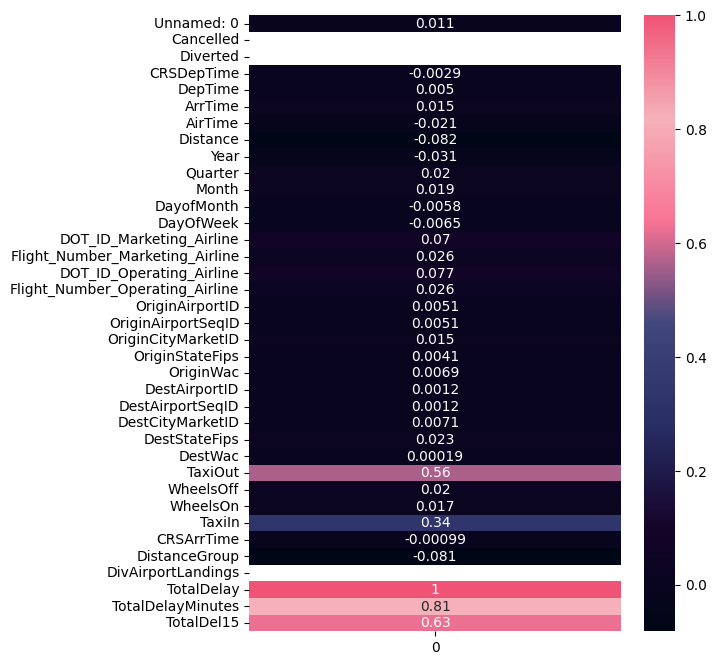

In [ ]:
#correlação das variáveis com o atraso

matriz = np.array(corr)
# Seleciona a coluna total_Delay
coluna_selecionada = matriz[:, -3]

# Cria uma nova matriz contendo apenas a coluna selecionada
nova_matriz = np.reshape(coluna_selecionada, (-1, 1))

figure
# Cria um heatmap da nova matriz de correlação

fig, ax = plt.subplots(figsize=(6, 8))

sns.heatmap(nova_matriz, annot=True, cmap=sg_palette,yticklabels=corr.columns)


plt.show()

Observamos falta de correlação entre as variáveis. No entanto observa-se que a maioria das variáveis(ainda que numéricas) possuem natureza categórica.
São em sua maioria IDs, horários, indicadores lógicos. Sendo assim a correlação de Pearson não é a forma indicada de avaliar essas relações.

In [ ]:
#Verifiquemos inicialmente a distribuição dos atrasos

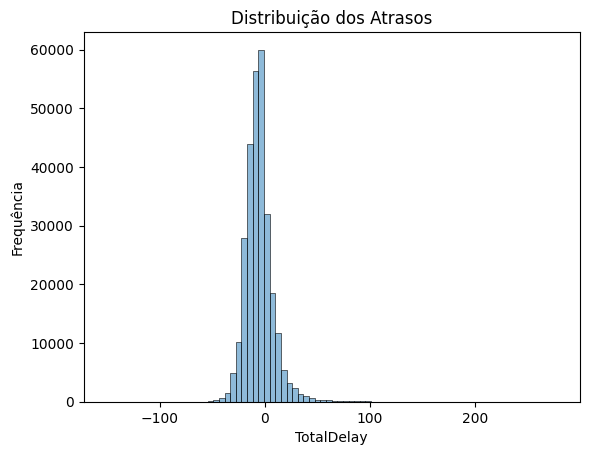

In [ ]:
# Definindo a faixa de valores
range_values = (0, 250)

# Plotando os histogramas
sns.histplot(df[atraso],bins = 80, alpha=0.5)

# Adicionando título e legendas
plt.title('Distribuição dos Atrasos')
plt.xlabel('TotalDelay')
plt.ylabel('Frequência')


# Exibindo o histograma
plt.show()

In [ ]:
#verificando se o atraso é distribuído normalmente
from scipy.stats import normaltest

# Extrai a coluna ArrDelay como uma série
total_delay = df[atraso]

# Aplica o teste de normalidade
stat, p = normaltest(total_delay)

# Imprime o resultado do teste
print('Estatística de teste:', stat)
print('Valor p:', p)

# Verifica se a distribuição é normal ou não
alpha = 0.05
if p > alpha:
    print('A distribuição é normal (não rejeita H0)')
else:
    print('A distribuição não é normal (rejeita H0)')

Estatística de teste: 110025.57172337538
Valor p: 0.0
A distribuição não é normal (rejeita H0)


#### Avaliação de Horários

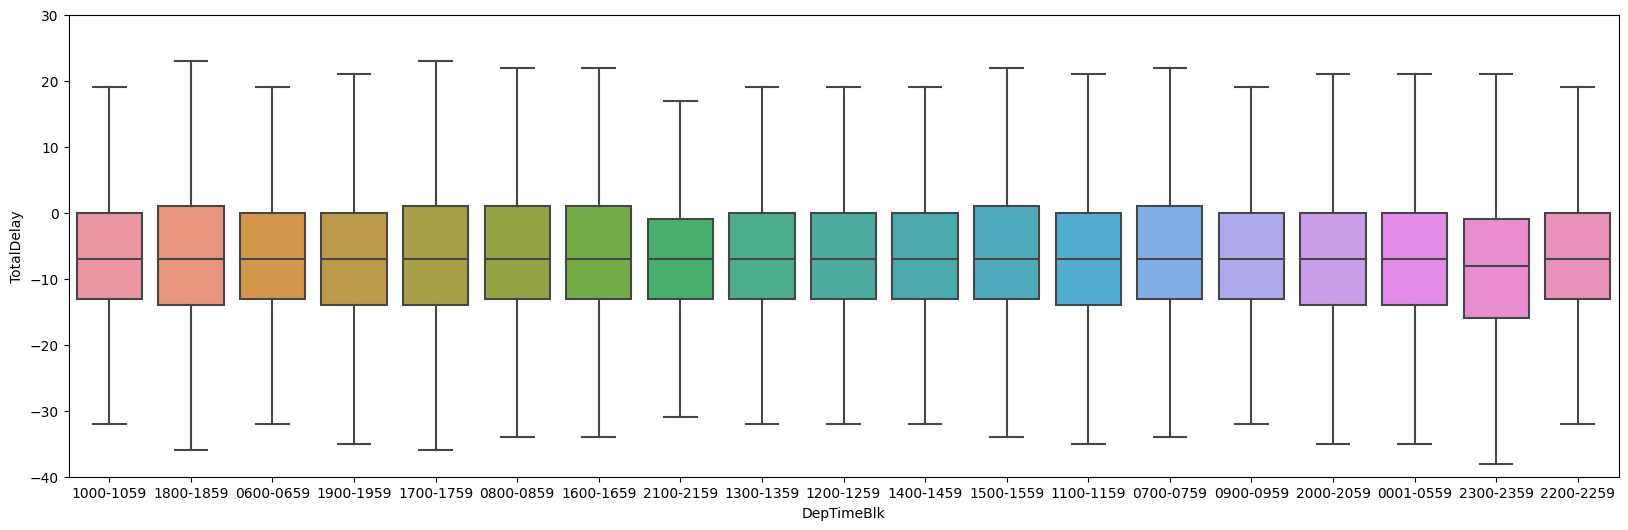

In [ ]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=df, x='DepTimeBlk', y=atraso,showfliers=False)
plt.ylim([-40, 30])  # Define o intervalo do eixo y
plt.show()

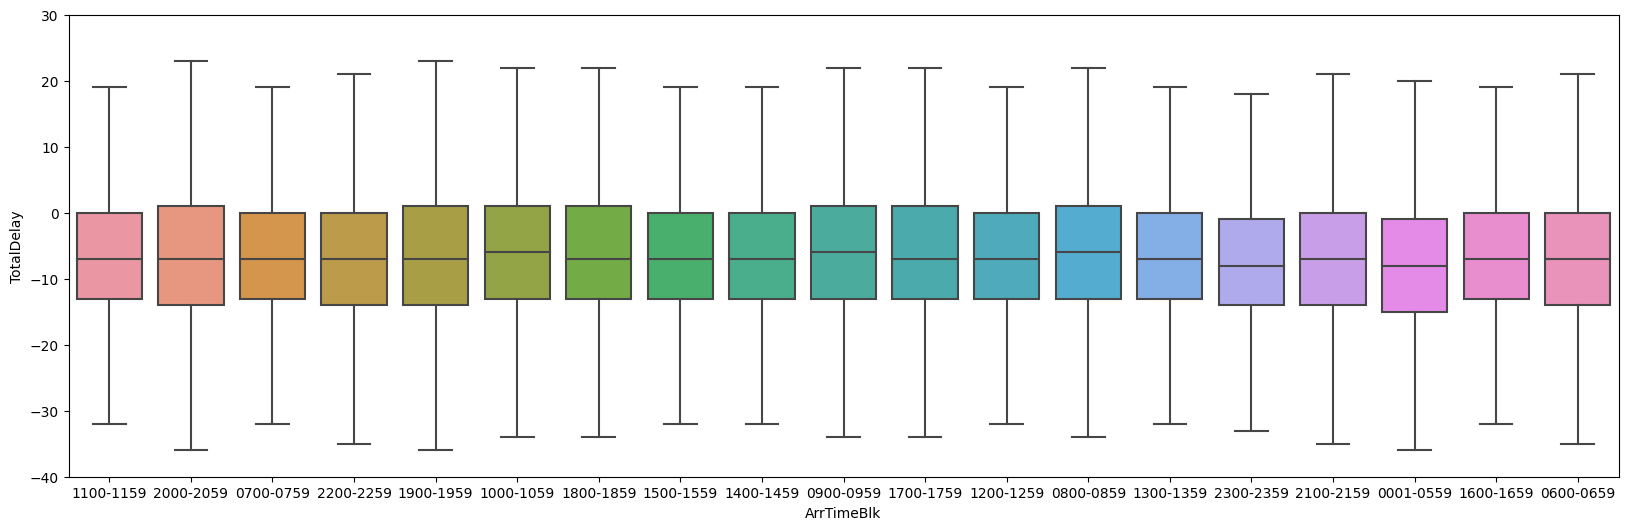

In [ ]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=df, x='ArrTimeBlk', y=atraso, showfliers=False)
plt.ylim([-40, 30])  # Define o intervalo do eixo y
plt.show()

####Avaliação de indicadores de tempo

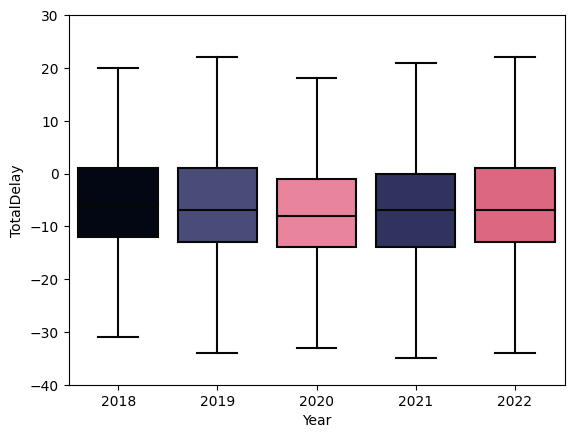

In [ ]:
sns.boxplot(data=df, x='Year', y=atraso,palette = cores_personalizadas, showfliers=False)
plt.ylim([-40, 30])  # Define o intervalo do eixo y
plt.show()

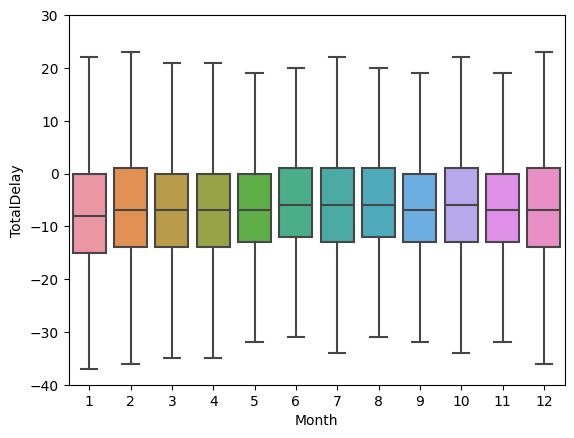

In [ ]:
sns.boxplot(data=df, x='Month', y=atraso,showfliers=False)
plt.ylim([-40, 30])  # Define o intervalo do eixo y
plt.show()

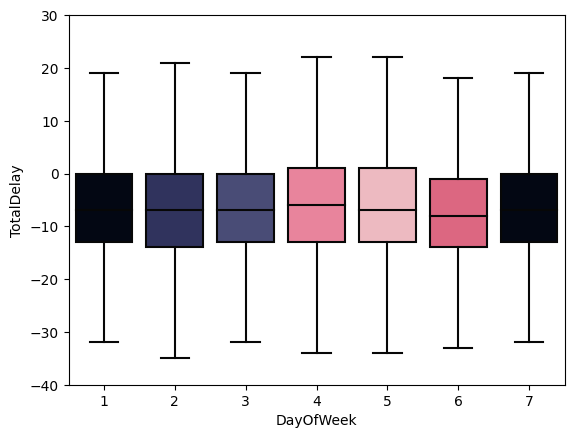

In [ ]:
sns.boxplot(data=df, x='DayOfWeek', y=atraso,showfliers=False,palette = sarah_gilbert_palette)
plt.ylim([-40, 30])  # Define o intervalo do eixo y
plt.show()

####Avaliação das variáveis associadas a Localização,Meteorologia e Rota

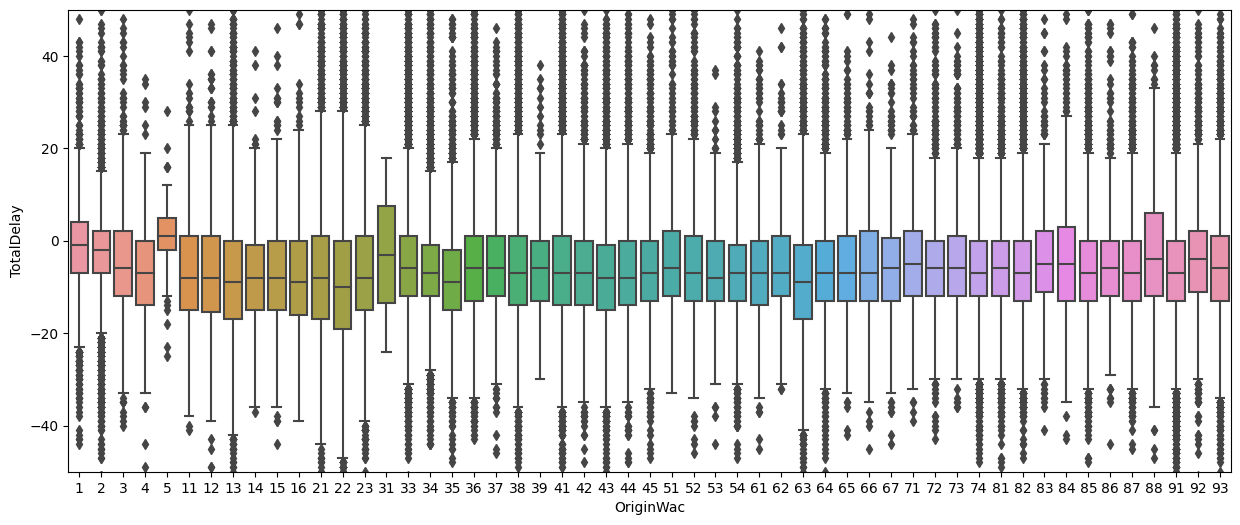

In [ ]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df, x='OriginWac', y=atraso)
plt.ylim([-50, 50])  # Define o intervalo do eixo y
plt.show()

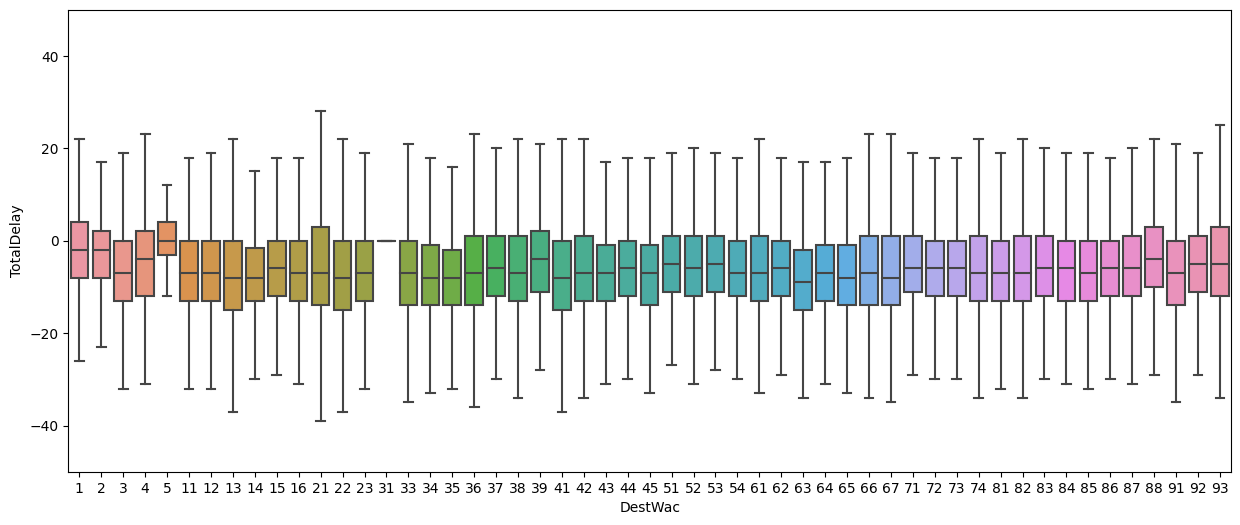

In [ ]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df, x='DestWac', y=atraso,showfliers=False)
plt.ylim([-50, 50])  # Define o intervalo do eixo y
plt.show()

####Avaliação das Variáveis associadas a questões Logísticas

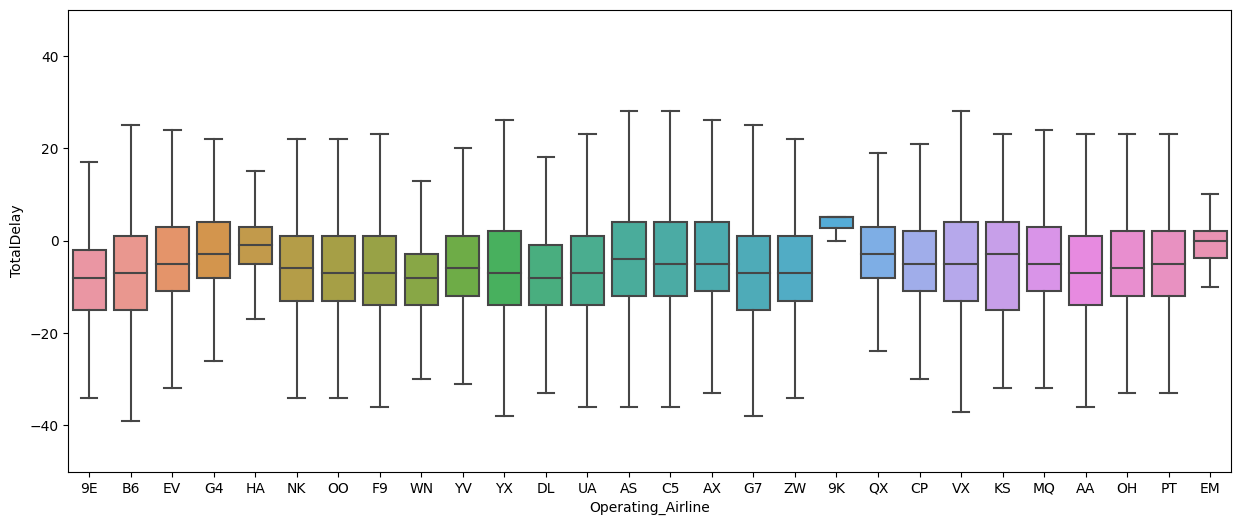

In [ ]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df, x='Operating_Airline', y=atraso,showfliers=False)
plt.ylim([-50, 50])  # Define o intervalo do eixo y
plt.show()

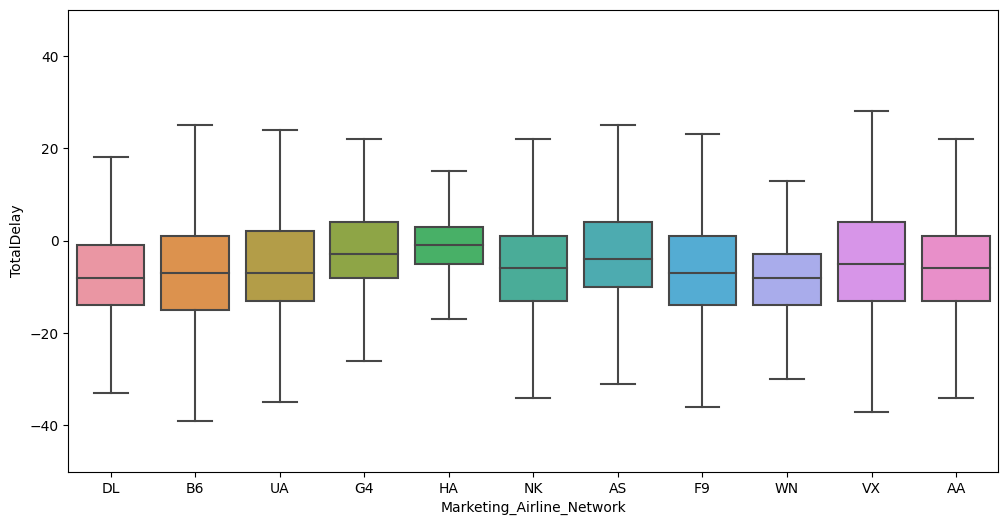

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Marketing_Airline_Network', y=atraso,showfliers=False)
plt.ylim([-50, 50])  # Define o intervalo do eixo y
plt.show()

##4)Modelagem
Construa um modelo de regressão linear em que queremos estimar o tempo de atraso de um voo.

OBS: Lembre-se de construir variáveis dummy a partir de categorias como: mês do ano e rotas específicas


###**Pré-Processamento**

In [ ]:
df_model = df_o1.copy()

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292111 entries, 0 to 40422
Data columns (total 62 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               292111 non-null  int64  
 1   FlightDate                               292111 non-null  object 
 2   Airline                                  292111 non-null  object 
 3   Origin                                   292111 non-null  object 
 4   Dest                                     292111 non-null  object 
 5   Cancelled                                292111 non-null  bool   
 6   Diverted                                 292111 non-null  bool   
 7   CRSDepTime                               292111 non-null  int64  
 8   DepTime                                  284442 non-null  float64
 9   DepDelayMinutes                          284419 non-null  float64
 10  DepDelay                         

In [ ]:
# excluindo variáveis categóricas dispensáveis

df_model = df_model.drop(columns=['IATA_Code_Marketing_Airline','IATA_Code_Operating_Airline','DOT_ID_Operating_Airline','DOT_ID_Marketing_Airline',
                    'Airline','Tail_Number','OriginCityName','OriginState',
                     'OriginStateName','DestCityName','DestState','DestStateName','DepTimeBlk','ArrTimeBlk','Marketing_Airline_Network','FlightDate'])

In [ ]:
# Excluindo delays que já estão inclusos em ActualElapsedTime
df_model = df_model.drop(columns=['ArrDelay','ArrDelayMinutes','DepDelay','DepDelayMinutes','ArrivalDelayGroups','DepartureDelayGroups','ArrDel15','DepDel15'])

In [ ]:
# excluindo variáveis numéricas dispensáveis
df_model = df_model.drop(columns=['Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginAirportSeqID','OriginCityMarketID','OriginStateFips','OriginWac','DestAirportID','DestAirportSeqID','DestCityMarketID','DestStateFips','DestWac','DistanceGroup'])

In [ ]:
# excluindo variáveis que após exclusão dos NaNs ficaram com apenas uma categoria, logo a correlação com o target é NaN
df_model = df_model.drop(columns=['DivAirportLandings','Cancelled','Diverted'])

In [ ]:
# Variáveis categóricas que serão transformadas e utilizadas

cat = []
for i in range(len(df_model.dtypes)):
  if df_model.dtypes[i] == object:
    cat.append(df_model.dtypes.index[i])
cat

['Origin',
 'Dest',
 'Operated_or_Branded_Code_Share_Partners',
 'Operating_Airline']

In [ ]:
# Transformando em binário (1 = Compartilhado, 0 = não compartilhado)

# variável indica se o voo é um código compartilhado (code-share) ou não.
df_model.Operated_or_Branded_Code_Share_Partners.unique()
df_model.Operated_or_Branded_Code_Share_Partners = df_model.Operated_or_Branded_Code_Share_Partners.replace(['DL_CODESHARE','UA_CODESHARE','AS_CODESHARE','AA_CODESHARE','HA_CODESHARE'],1)
df_model.Operated_or_Branded_Code_Share_Partners = df_model.Operated_or_Branded_Code_Share_Partners.replace(['B6', 'G4', 'HA', 'NK', 'F9', 'WN', 'DL', 'UA', 'AS', 'VX','AA'],0)


In [ ]:
# Frequência acumulada principais companhias
principais_companhias = criterio_freq_acum(df_model,'Operating_Airline',0.8)

In [ ]:
# Frequência acumulada principais origens
principais_origens = criterio_freq_acum(df_model,'Origin',0.8)

In [ ]:
# Frequência acumulada principais destinos
principais_destinos = criterio_freq_acum(df_model,'Dest',0.8)

In [ ]:
# transformando as demais origens da coluna em "outras"
df_model['Origin'] = np.where(df_model['Origin'].isin(principais_origens),df_model['Origin'],'Outras')

In [ ]:
# transformando os demais destinos da coluna em "outras"
df_model['Dest'] = np.where(df_model['Dest'].isin(principais_destinos),df_model['Dest'],'Outros')

In [ ]:
# transformando as demais companhias da coluna em "outras"
df_model['Operating_Airline'] = np.where(df_model['Operating_Airline'].isin(principais_companhias),df_model['Operating_Airline'],'Outras')

In [ ]:
df_model = pd.get_dummies(df_model,
                   prefix=None,
                   prefix_sep='_',
                   dummy_na=False,
                   columns=None,
                   sparse=False,
                   drop_first=True,
                   dtype=None)

In [ ]:
# excluindo NaN
df_model.dropna(inplace = True)

In [ ]:
atraso = df_model.ActualElapsedTime - df_model.CRSElapsedTime
df_model['atraso'] = atraso
df_model = df_model.drop(columns=['ActualElapsedTime','CRSElapsedTime'])

### Funções para plot dos gráficos

In [ ]:
def freq_residuos(res):
  ax = sns.histplot(res,color=medium_purple)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Distribuição de Frequência dos Resíduos', fontsize=18)
  ax.set_xlabel('Atraso', fontsize=14)
  ax.set_ylabel('Quantidade', fontsize=14)
  ax;


def dispersao_estimado_real(estimado,real):
  ax = sns.scatterplot(x=estimado, y=real, color=light_purple)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Previsão X Real', fontsize=18)
  ax.set_xlabel('Atraso - Previsão', fontsize=14)
  ax.set_ylabel('Atraso - Real', fontsize=14)
  ax;


def residuos_X_previsao(previsao,residuo):
  ax = sns.scatterplot(x=previsao, y=residuo, s=150,color=light_purple)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Resíduos X Previsão', fontsize=18)
  ax.set_xlabel('Atraso- Previsão', fontsize=14)
  ax.set_ylabel('Resíduos', fontsize=14)
  ax;


def previsto_X_residuo_ao_quadrado(previsto,residuo):
  ax = sns.scatterplot(x=previsto, y=residuo**2, s=150, color=light_purple)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Resíduos X Previsão', fontsize=18)
  ax.set_xlabel('Atraso - Previsão', fontsize=14)
  ax.set_ylabel('Resíduos²', fontsize=14)
  ax;

###Configuração do Modelo

In [ ]:
def conf_modelo(df):

  Y = df.atraso
  X = df.drop(columns=['atraso'])

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

  X_train_com_constante = sm.add_constant(X_train)
  X_test_com_constante = sm.add_constant(X_test)

  modelo = sm.OLS(y_train,X_train_com_constante,hasconst=True).fit()

  y_previsto = modelo.predict(X_test_com_constante)

  y_previsto_train = modelo.predict(X_train_com_constante) # previsões para os dados de treino

  residuo = y_train - y_previsto_train

  # métricas

  EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
  REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
  R2 = metrics.r2_score(y_test, y_previsto).round(2)

  print(pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas']))

  return y_previsto_train, y_train, residuo, modelo

###**Modelo1**

Utilizando o dataframe resultante após o pré-processamento dos dados.

In [ ]:
y_previsto_train, y_train, residuo, modelo1 = conf_modelo(df_model)

      Métricas
EQM      57.67
REQM      7.59
R²        0.68


In [ ]:
#summary
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                 atraso   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2914.
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        23:43:11   Log-Likelihood:            -6.8385e+05
No. Observations:              198480   AIC:                         1.368e+06
Df Residuals:                  198336   BIC:                         1.369e+06
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### Gráficos

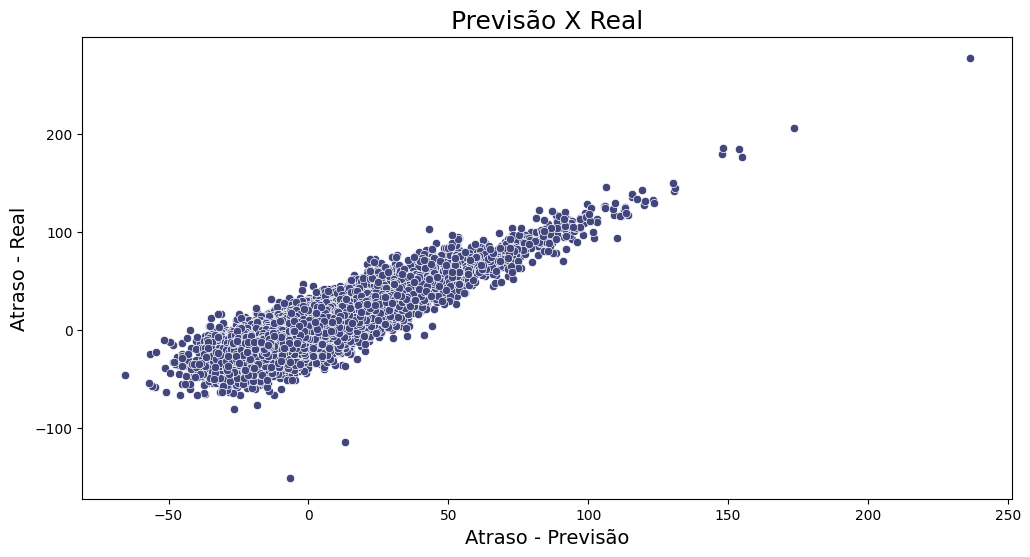

In [ ]:
#Gráfico de dispersão entre valor estimado e valor real
dispersao_estimado_real(y_previsto_train,y_train)

Mostra uma relação linear entre a previsão e o real valor, porém com alguns pontos dispersos, o que poderia tentar ser melhorado ajustando o modelo.

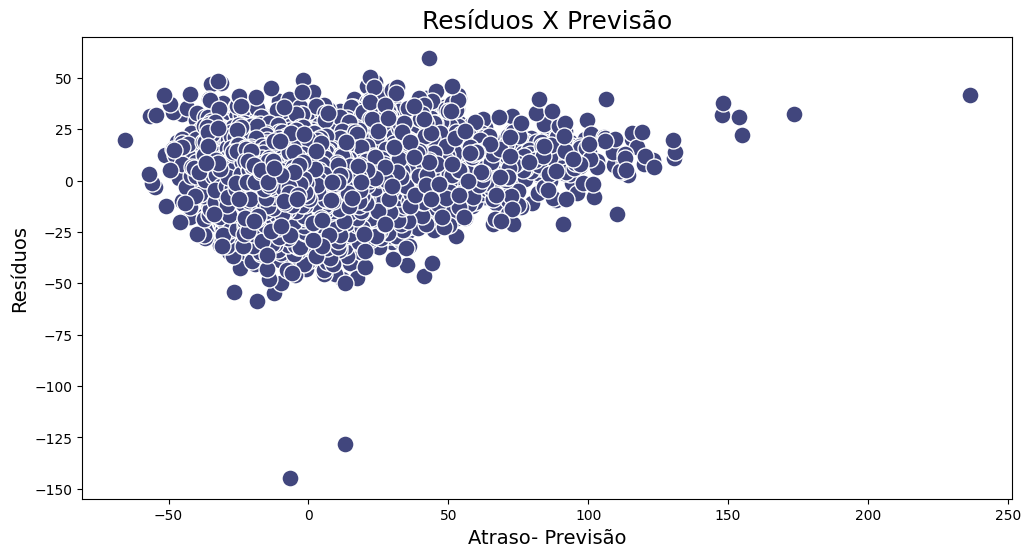

In [ ]:
#Gráfico de dispersão entre a previsão e os resíduos
residuos_X_previsao(y_previsto_train,residuo)

A variância dos resíduos, aparentemente, é constante, o que é importante para o modelo de regressão.


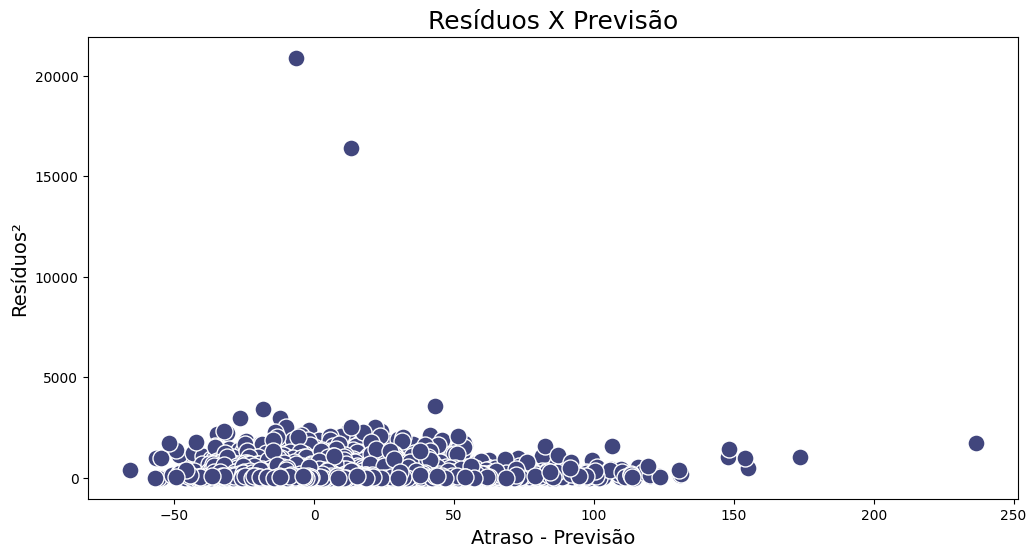

In [ ]:
#Gráfico de dispersão entre a previsão e os resíduos ao quadrado
previsto_X_residuo_ao_quadrado(y_previsto_train,residuo)

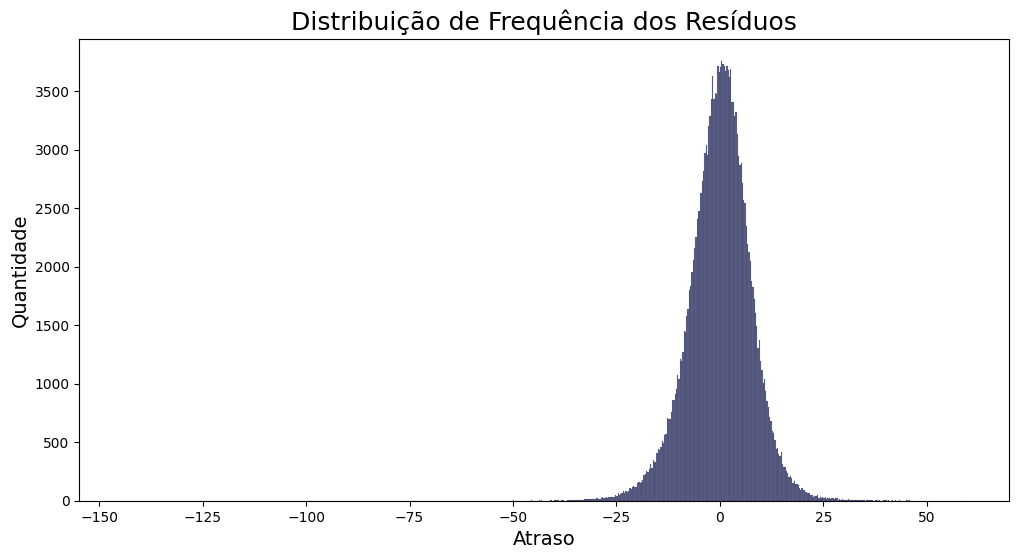

In [ ]:
#Distribuição de Frequência dos resíduos
freq_residuos(residuo)

Distribuição dos resíduos se assemelha a uma curva normal, o que mostra que os resíduos estão bem comportados, o que favorece um modelo bem estimado.

###**Modelo2**

Modelo que possui a mesma configuração do modelo 1, exceto pela exclusão das variáveis que não são estatisticamente significantes para o modelo, como foi observado através do p-valor disponível na função summary.

In [ ]:
#excluidos pelo p-value alto
df2 = df_model.drop(columns=['Year','Origin_SJC','Month','DayOfWeek','Origin_BOI','Origin_SJC','Dest_LGA','Dest_MSP','Dest_SAN','Operating_Airline_AA','Operating_Airline_OO','Origin_SNA','Origin_OAK','Dest_HOU'])

In [ ]:
y_previsto_train, y_train, residuo, modelo2 = conf_modelo(df2)

      Métricas
EQM      57.69
REQM      7.60
R²        0.68


In [ ]:
#summary
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                 atraso   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3204.
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        23:43:25   Log-Likelihood:            -6.8388e+05
No. Observations:              198480   AIC:                         1.368e+06
Df Residuals:                  198349   BIC:                         1.369e+06
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

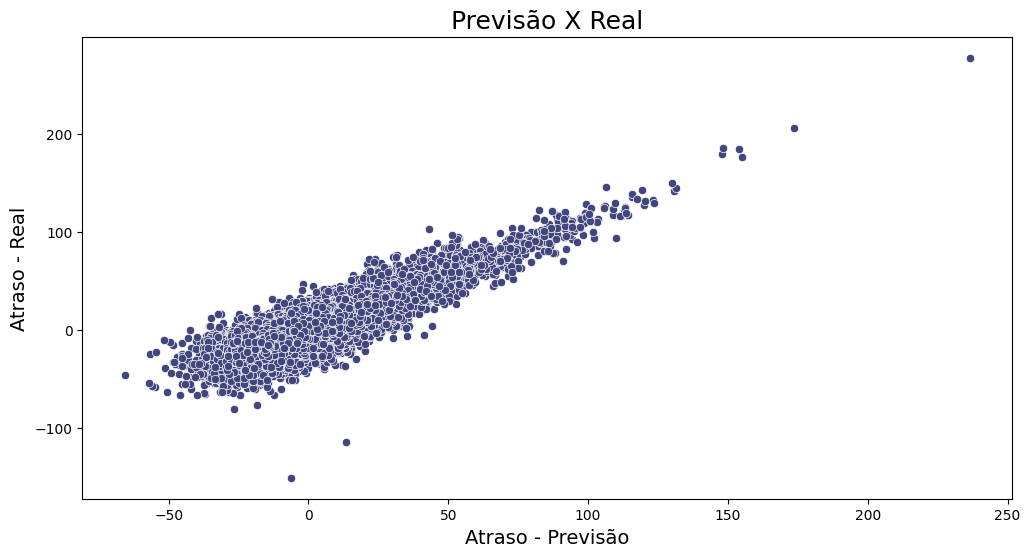

In [ ]:
#Gráfico de dispersão entre valor estimado e valor real
dispersao_estimado_real(y_previsto_train,y_train)

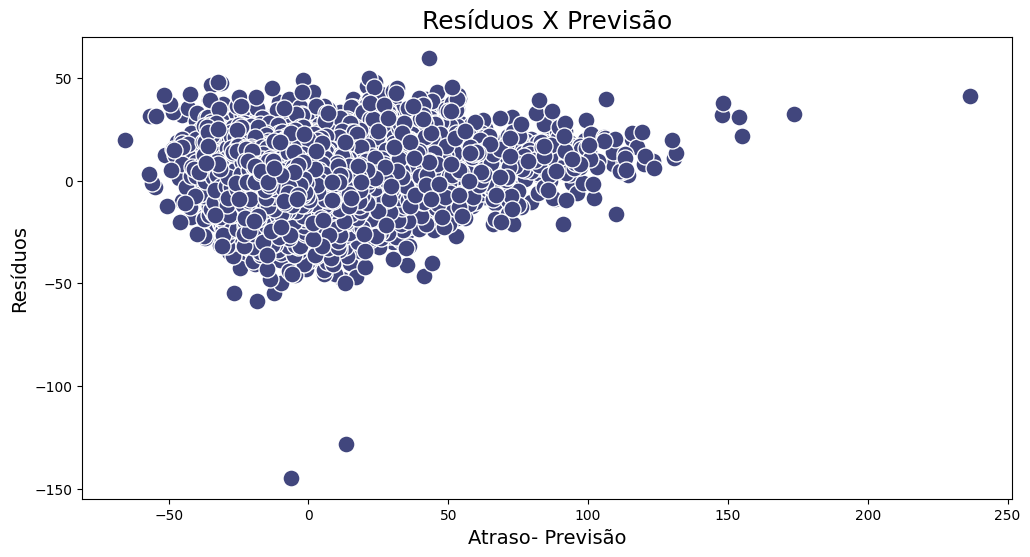

In [ ]:
#Gráfico de dispersão entre a previsão e os resíduos
residuos_X_previsao(y_previsto_train,residuo)

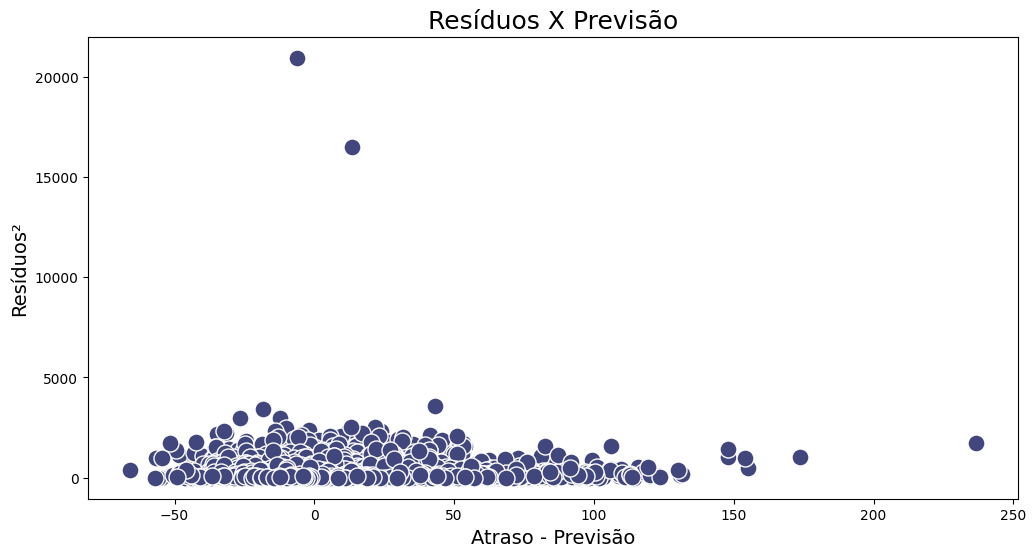

In [ ]:
#Gráfico de dispersão entre a previsão e os resíduos ao quadrado
previsto_X_residuo_ao_quadrado(y_previsto_train,residuo)

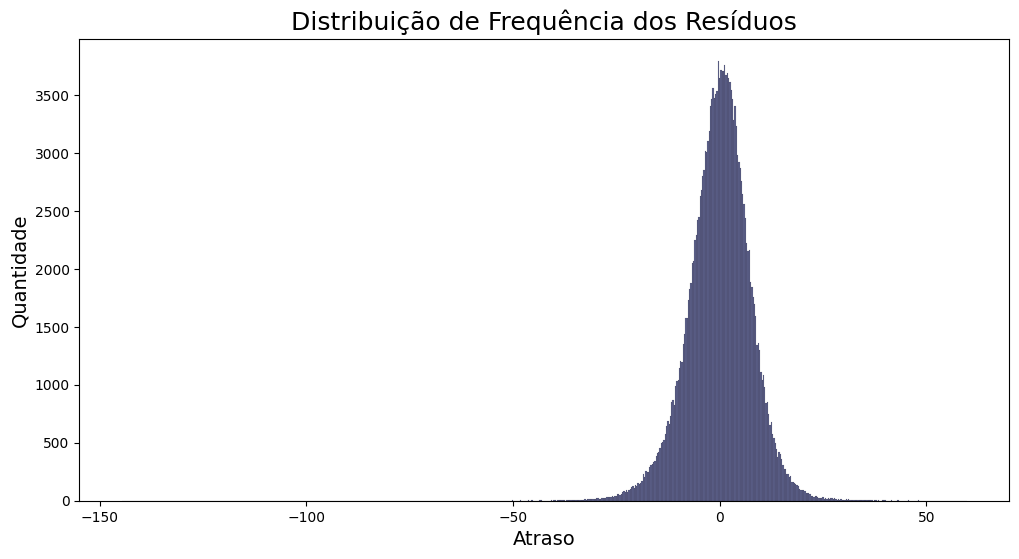

In [ ]:
#Distribuição de Frequência dos resíduos
freq_residuos(residuo)

Ao observar tanto o valor do r² como os gráficos acima, percebe-se que as variáveis excluídas realmente não são relevantes, dado que após a sua exclusão o modelo 2 se comportou praticamente igual ao modelo 1.

###**Modelo3**

Modelo que utiliza as configurações do modelo 2, porém os outliers da variável atraso serão excluídos em uma tentativa de melhoria do modelo anterior.

In [ ]:
# Detectando outliers

# IQR
Q1 = np.percentile(df2['atraso'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df2['atraso'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Tamanho anterior: ", df2.shape)

Tamanho anterior:  (283544, 131)


<ipython-input-150-1659aa6c8607>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2['atraso'], 25,
<ipython-input-150-1659aa6c8607>:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2['atraso'], 75,


In [ ]:
# calculando limite inferior
lim_inferior = Q1-1.5*IQR
lim_inferior

-32.5

In [ ]:
# calculando limite superior
lim_superior = Q3+1.5*IQR
lim_superior

19.5

In [ ]:
# excluindo outliers
df3 = df2.drop(df2.query('atraso > 19.5 | atraso < -32.5').index, axis = 0)

In [ ]:
y_previsto_train, y_train, residuo, modelo3 = conf_modelo(df3)

      Métricas
EQM      47.09
REQM      6.86
R²        0.51


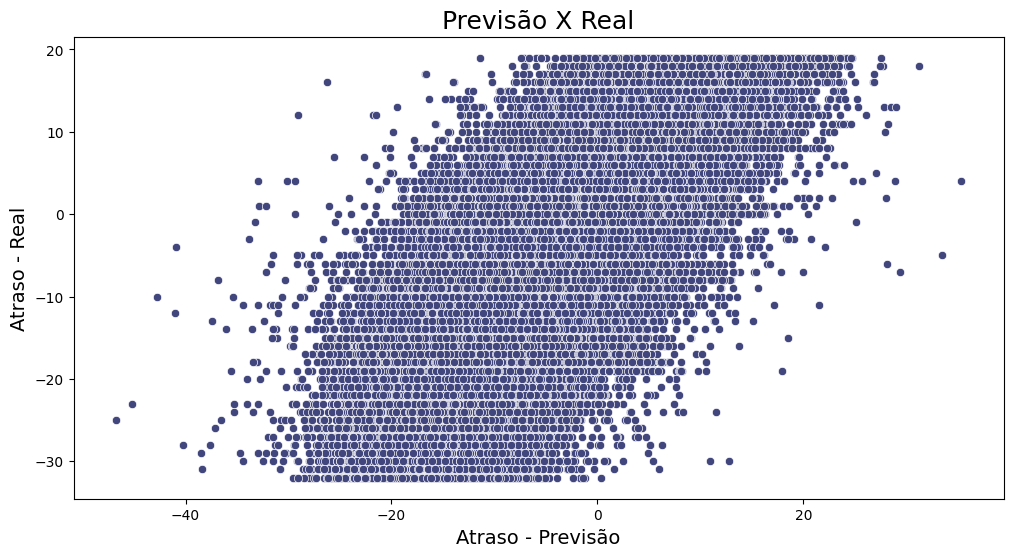

In [ ]:
dispersao_estimado_real(y_previsto_train,y_train)

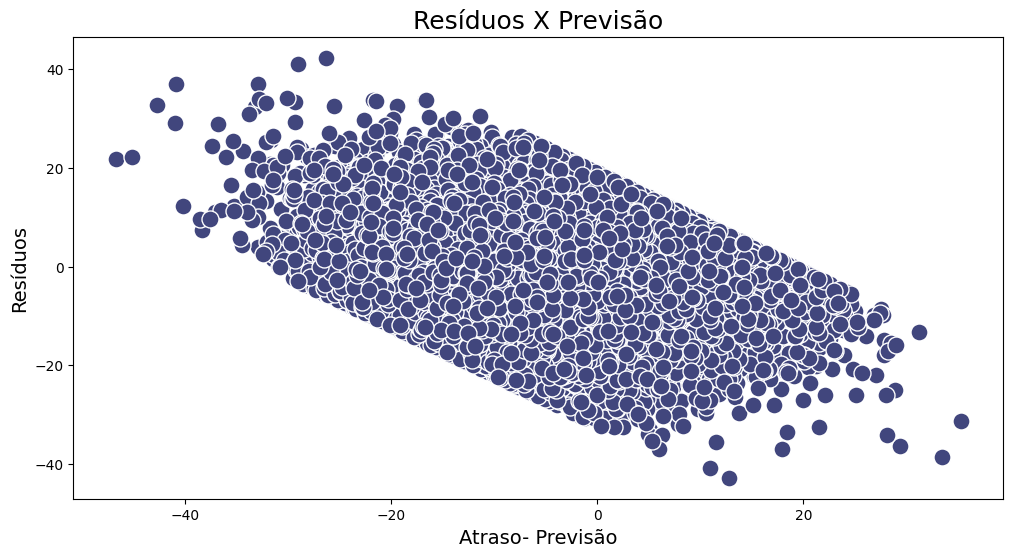

In [ ]:
residuos_X_previsao(y_previsto_train,residuo)

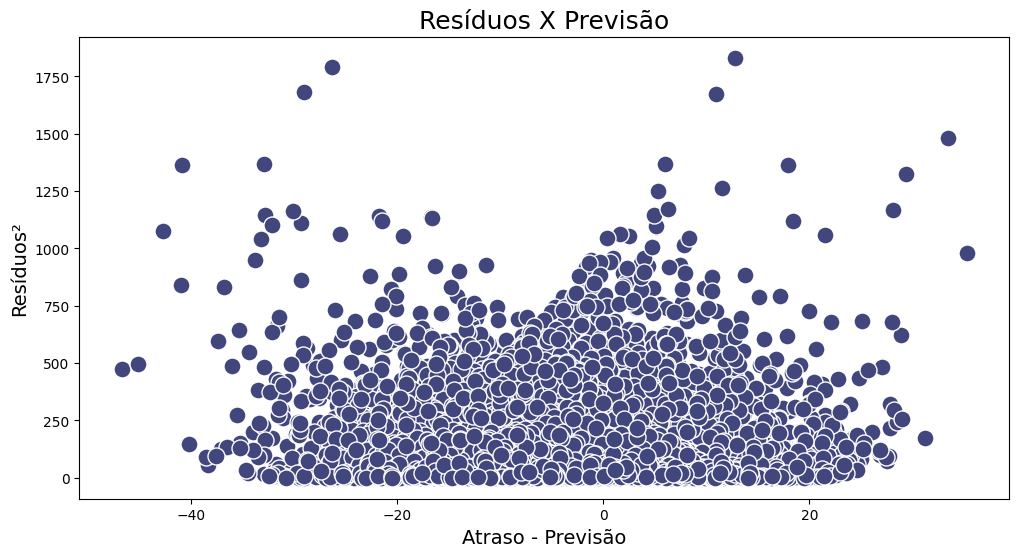

In [ ]:
previsto_X_residuo_ao_quadrado(y_previsto_train,residuo)

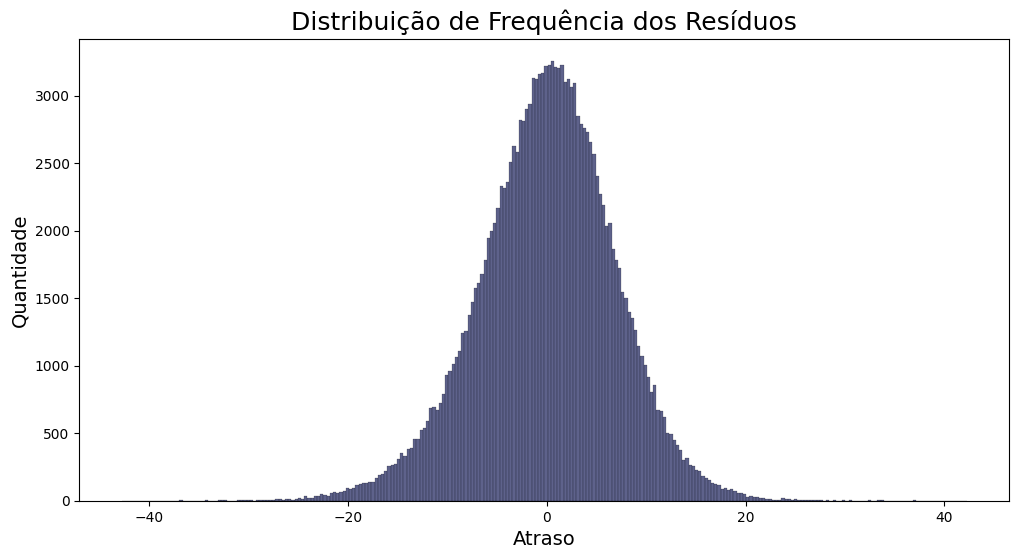

In [ ]:
freq_residuos(residuo)

Após observar o r² e os gráficos do modelo 3, é notório que a abordagem de excluir os outliers piorou o desempenho preditivo do modelo, dado que o r² foi reduzido e não mais se observa uma variância constante nos resíduos.

CONCLUSÂO: Em uma possível necessidade de escolha entre os 3 modelos, o modelo escolhido seria o modelo 2. Dado que mesmo que este possua um r² semelhante ao do modelo 1, ele utiliza menos variáveis na modelagem, o que poderia reduzir o custo computacional em relação ao modelo 1.